<a href="https://colab.research.google.com/github/Hallowtipz/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Jesse_Ghansah_LS_DS_113_Making_Data_backed_Assertions_Assignment_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [0]:
import pandas as pd

In [0]:
#loading the data
person_data_source = 'https://raw.githubusercontent.com/Hallowtipz/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'
person = pd.read_csv(person_data_source)

In [3]:
#explore the dataframe
person.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [4]:
#check for missing values
nan_values = person.isna().sum()
print(nan_values)

Unnamed: 0       0
age              0
weight           0
exercise_time    0
dtype: int64


In [5]:
#variables are integers
person.dtypes

Unnamed: 0       int64
age              int64
weight           int64
exercise_time    int64
dtype: object

In [6]:
# Let's use crosstabulation to try to see what's going on
person_crosstab = pd.crosstab(person['age'], person['weight'])
person_crosstab.head()

weight,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,233,234,236,237,238,239,240,241,242,244,246
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [7]:
#check the number of columns and rows
person_crosstab.shape

(63, 143)

In [0]:
#group or bin the weight column values cos they are continuous
weight_bins = pd.cut(person['weight'], 5)  
person_crosstab_1 = pd.crosstab(person['age'], weight_bins)

In [25]:
#downgrade pandas to avoid the error
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 5.2MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [9]:
person_crosstab_1

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
age,,,,,
18,7,8,3,2,0
19,4,7,6,5,1
20,6,4,5,2,0
21,5,5,6,2,0
22,4,9,3,2,1
23,9,5,2,5,0
24,6,4,4,1,2
25,7,7,2,1,2
26,3,9,2,1,0


In [10]:
#normalize the crosstabulation
person_crosstab_norm = pd.crosstab(person['age'], weight_bins, normalize='columns')
person_crosstab_norm

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
age,,,,,
18,0.018667,0.023881,0.011628,0.011173,0.000000
19,0.010667,0.020896,0.023256,0.027933,0.018868
20,0.016000,0.011940,0.019380,0.011173,0.000000
21,0.013333,0.014925,0.023256,0.011173,0.000000
22,0.010667,0.026866,0.011628,0.011173,0.018868
23,0.024000,0.014925,0.007752,0.027933,0.000000
24,0.016000,0.011940,0.015504,0.005587,0.037736
25,0.018667,0.020896,0.007752,0.005587,0.037736
26,0.008000,0.026866,0.007752,0.005587,0.000000


In [11]:
#create a subset
ct_subset_1 = person_crosstab_norm.iloc[:, [2,3]]
ct_subset_1

weight,"(158.4, 187.6]","(187.6, 216.8]"
age,,
18,0.011628,0.011173
19,0.023256,0.027933
20,0.019380,0.011173
21,0.023256,0.011173
22,0.011628,0.011173
23,0.007752,0.027933
24,0.015504,0.005587
25,0.007752,0.005587
26,0.007752,0.005587


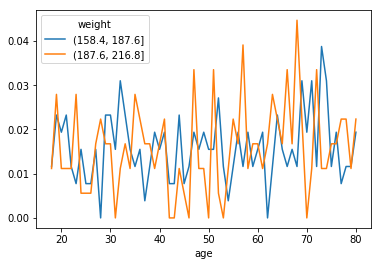

In [0]:
#plotting the subset
ct_subset_1.plot()

In [0]:
#grouping or binning our 3rd variable since it's continuous
time_bins = pd.cut(person['exercise_time'], 5)  # 5 equal-sized bins
person_crosstab_2 = pd.crosstab(person['age'], time_bins)


In [14]:
person_crosstab_2

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
age,,,,,
18,2,6,4,6,2
19,5,8,3,5,2
20,2,4,3,4,4
21,2,2,6,6,2
22,4,5,6,4,0
23,4,4,7,4,2
24,3,3,5,3,3
25,4,2,2,6,5
26,1,3,2,3,6


In [15]:
#normalize the crosstabulation
person_crosstab_norm_2 = pd.crosstab(person['age'], time_bins, normalize='columns')
person_crosstab_norm_2

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
age,,,,,
18,0.007194,0.018987,0.017937,0.031250,0.010471
19,0.017986,0.025316,0.013453,0.026042,0.010471
20,0.007194,0.012658,0.013453,0.020833,0.020942
21,0.007194,0.006329,0.026906,0.031250,0.010471
22,0.014388,0.015823,0.026906,0.020833,0.000000
23,0.014388,0.012658,0.031390,0.020833,0.010471
24,0.010791,0.009494,0.022422,0.015625,0.015707
25,0.014388,0.006329,0.008969,0.031250,0.026178
26,0.003597,0.009494,0.008969,0.015625,0.031414


In [16]:
#create a subset
ct_subset_2 = person_crosstab_norm_2.iloc[:, [1,2,3]]
ct_subset_2

exercise_time,"(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]"
age,,,
18,0.018987,0.017937,0.031250
19,0.025316,0.013453,0.026042
20,0.012658,0.013453,0.020833
21,0.006329,0.026906,0.031250
22,0.015823,0.026906,0.020833
23,0.012658,0.031390,0.020833
24,0.009494,0.022422,0.015625
25,0.006329,0.008969,0.031250
26,0.009494,0.008969,0.015625


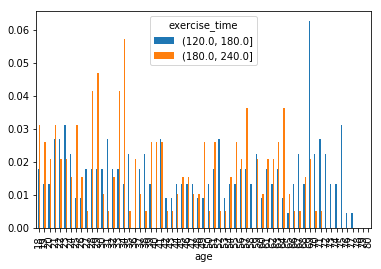

In [0]:
#plot the subset
ct_subset_2.plot(kind='bar')

Text(0, 0.5, 'Time Bins')

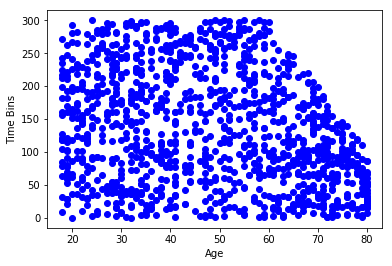

In [19]:
import matplotlib.pyplot as plt
plt.scatter(person['age'], person['exercise_time'], c='b')
plt.xlabel('Age')
plt.ylabel('Time')

Text(0, 0.5, 'Weight')

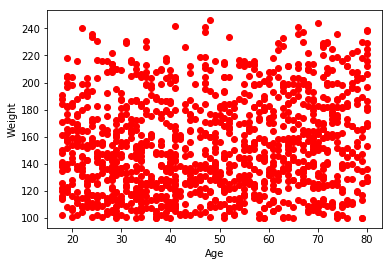

In [22]:
plt.scatter(person['age'], person['weight'], c='r')
plt.xlabel('Age')
plt.ylabel('Weight')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

The variable types are integers




2.  What are the relationships between the variables?


Exercise time is inversely proportional with age. 

Age and weight seem to be associated but not entirely clear.


3.  Which relationships are "real", and which spurious?

Exercise time and age seem to be real since as people age, their ability to exercise naturally reduces

The relationship between weight and age is spurious. There is no 



## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)